In [99]:
##### Problem 1
import numpy as np
import matplotlib.pyplot as plt

In [100]:
# simulate BM path
N = 3650
zt = np.cumsum(np.random.normal(size=T-1) * np.sqrt(1/N))
zt = np.insert(wt,0,0)

In [101]:
# geometric BM function
def gbm(t, wt, mu, sigma, s0=1):
    return s0 * np.exp( sigma*wt + (mu - 1/2*sigma**2)*t )

In [102]:
# simulate geometric BM path
mu = 0.06
sigma = 0.2
times = [0+i*(1/N) for i in range(1,N+1)]
times.insert(0,0)
st = [gbm(times[t], zt[t], mu, sigma) for t in range(N)]

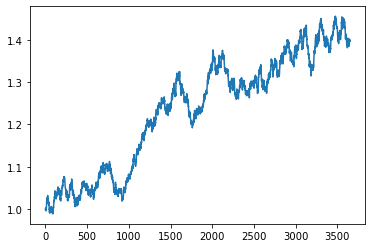

In [103]:
plt.plot(st)

In [104]:
# daily continuously compounded returns
st0 = st[:-1]
st1 = st[1:]
rt = np.log(st1) - np.log(st0)

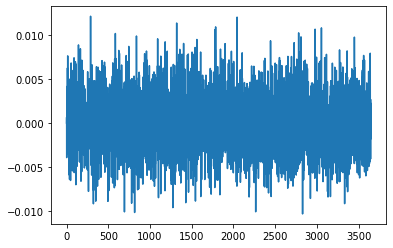

In [105]:
plt.plot(rt)

In [106]:
rt_ymean = 365*np.mean(rt)
rt_ystdv = np.sqrt(365)*np.std(rt)
print("annualized mean of daily log-returns: ", rt_ymean, "\nannualized standard deviation of daily log-returns: ", rt_ystdv)

annualized mean of daily log-returns:  0.03357762112817323 
annualized standard deviation of daily log-returns:  0.06428369855284949
